In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
import time

In [2]:
# Generate random map
def generate_random ( map_size = 10 ):
    size = 2**map_size
    return np.random.rand(size,size) 

In [3]:
# Output
def show(a):
    plt.figure(figsize = (10,10))
    plt.imshow(a)

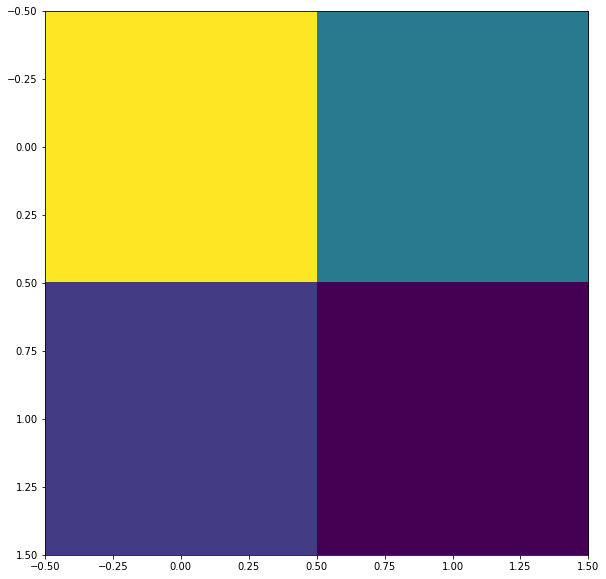

In [4]:
# How a random map looks like
# Each value is random from 0 to 1
show( generate_random( map_size = 1 ) )

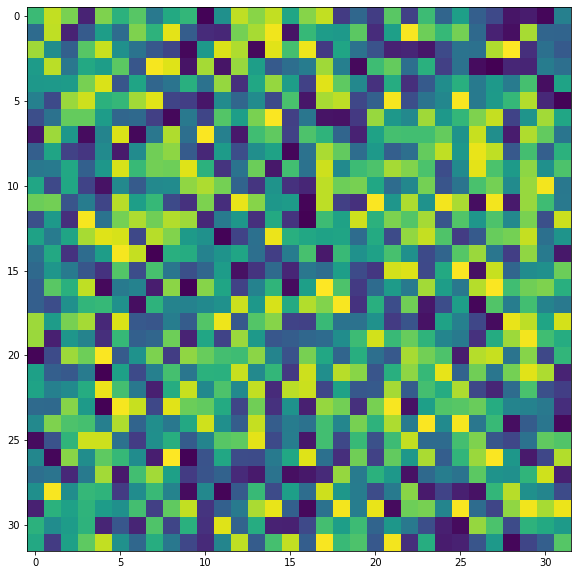

In [5]:
# Can be of various sizes
show( generate_random( map_size = 5 ) )

In [6]:
def merge ( maps ):
    
    # Compute the max map size
    max_size = max([ m.shape[0] for m in maps ])
    a = np.zeros((max_size,max_size))
    
    # Merge through addition
    for m in maps:
        a += cv2.resize( m, (max_size,max_size) )   
    
    return a

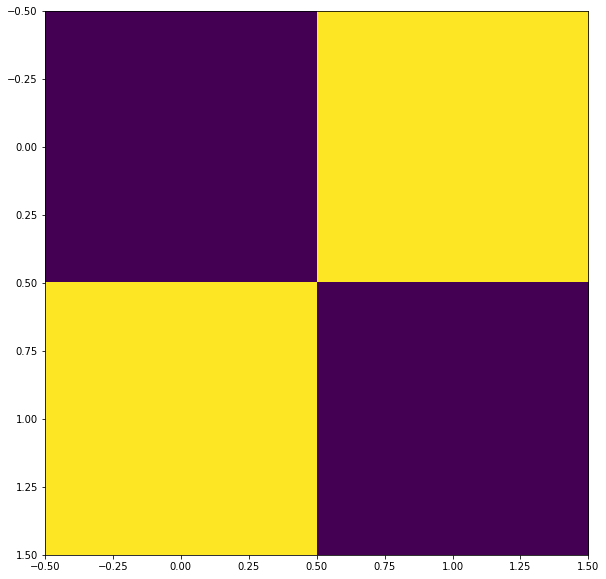

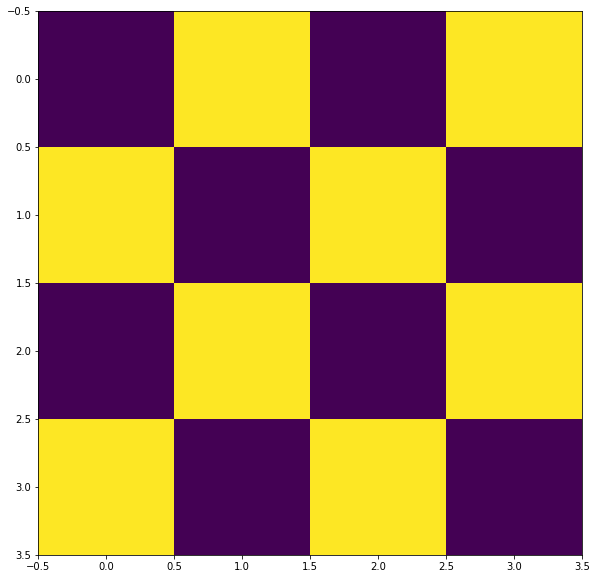

In [7]:
# Lets combine some small custom maps
a_1 = np.array([ [0.1,1], [1,0.1] ]) * 100
a_2 = np.array([ 
    [0,1,0,1], 
    [1,0,1,0], 
    [0,1,0,1], 
    [1,0,1,0]
]) / 100 

show(a_1)
show(a_2)

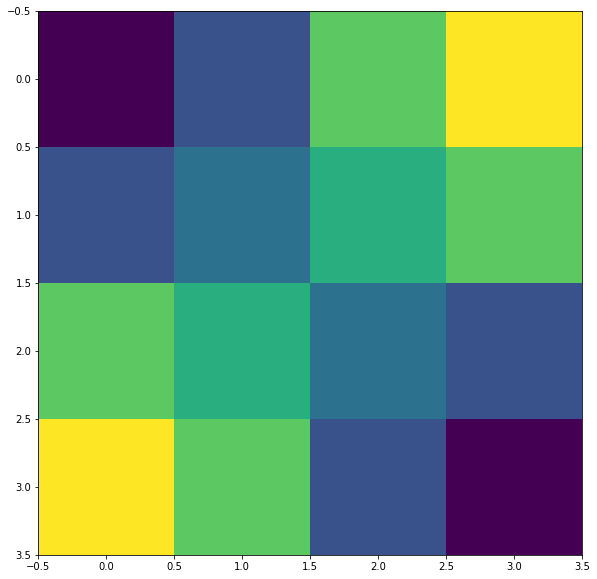

In [8]:
# Merge the above to see effects
show( merge([ a_1, a_2 ] ) )

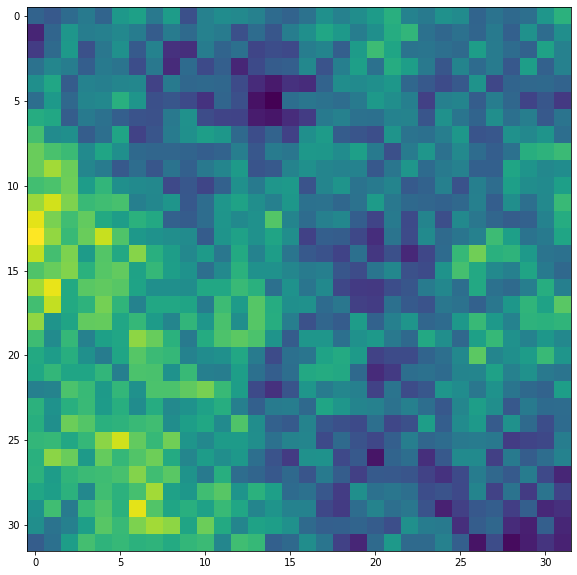

In [9]:
# Lets combine some maps
show( 
    merge([
        generate_random( map_size = 1 ),
        generate_random( map_size = 2 ),
        generate_random( map_size = 3 ),
        generate_random( map_size = 4 ),
        generate_random( map_size = 5 )
    ])
)

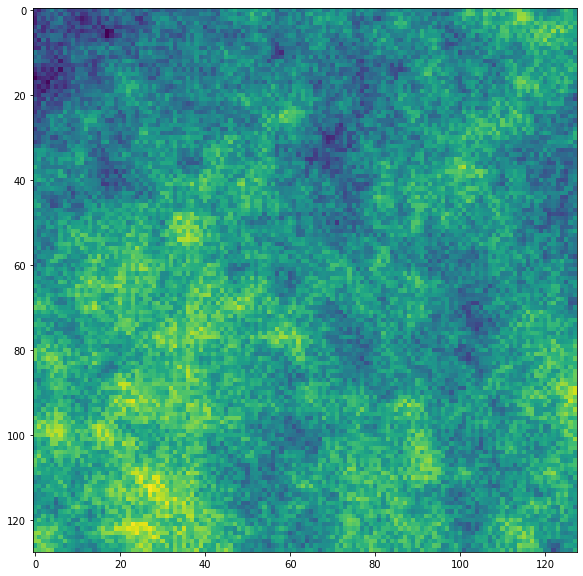

In [10]:
# MORE MAPS
show( 
    merge([
        generate_random( map_size = 1 ),
        generate_random( map_size = 2 ),
        generate_random( map_size = 3 ),
        generate_random( map_size = 4 ),
        generate_random( map_size = 5 ),
        generate_random( map_size = 6 ),
        generate_random( map_size = 7 ),
    ])
)

In [11]:
# Unified generation function Generation function
def generate ( map_size = 10, start_point = 0, extra_layers=[] ):
    
    size = 2**map_size
    
    # Choose what layers you want
    _ranges = list(range(start_point,map_size))
    _ranges.extend(extra_layers)
    
    # The output map
    a = np.zeros((size,size))
    
    # Compute layers
    for layer in _ranges:
        l = 2**layer
        rand = np.random.rand(l,l) /l
        a += cv2.resize( rand, (size,size) )   
        
    # Return
    return (a-a.min())/(a.max()-a.min())

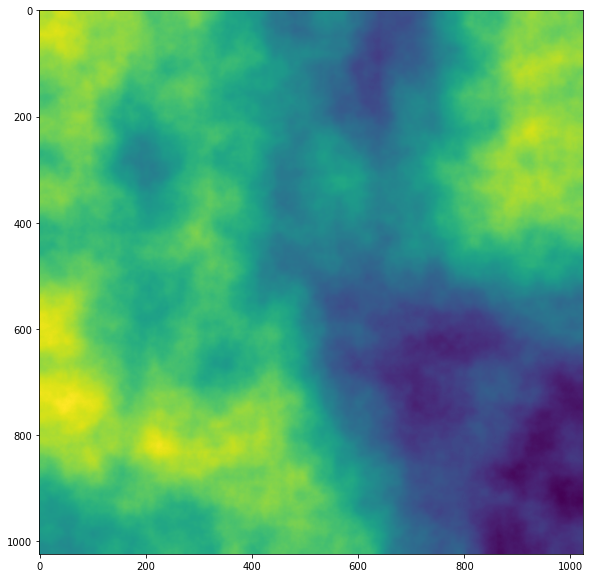

In [12]:
# Simple gradient
show( generate( map_size=10 ) )

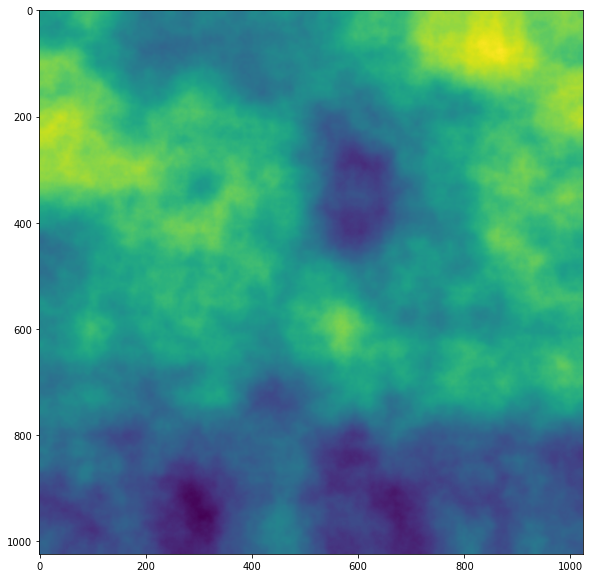

In [13]:
# Gradient can be scaled witht the start_point
show( generate( map_size=10, start_point=2 ) )

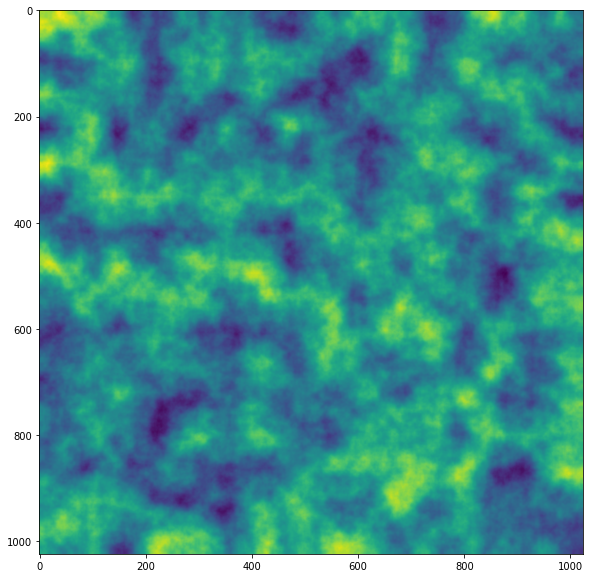

In [14]:
# Even further out
show( generate( map_size=10, start_point=4 ) )

In [15]:
# Draw a halo effect arround layers above a cetain hight
def select (a, v, r):
    _r = np.logical_and(a > (v-r), a < (v+r))
    a[_r] = 0
    a[a < (v-r)] *= 0.8
    return a


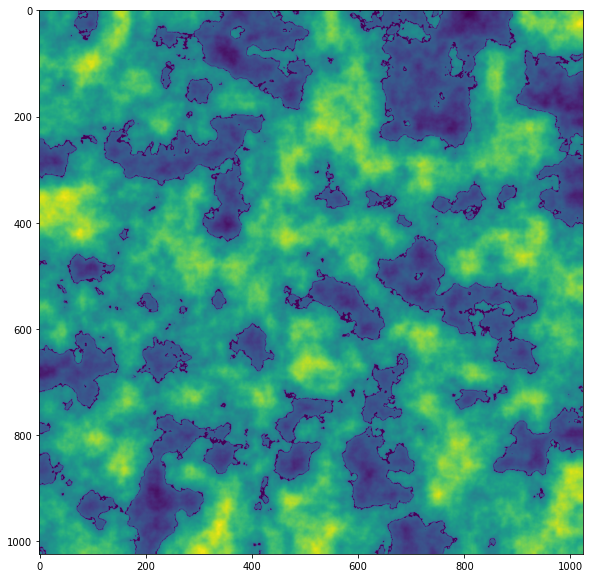

In [16]:
# Apply some borders
_ = generate( map_size=10, start_point=4 )
_ = select(_,0.4, 0.01)
show( _ )

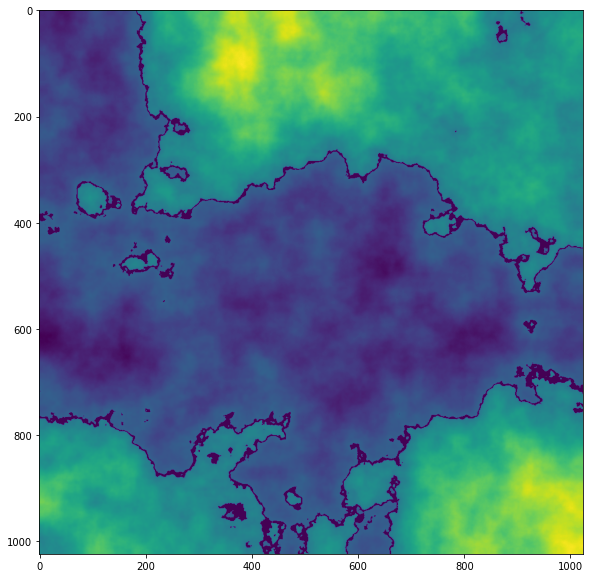

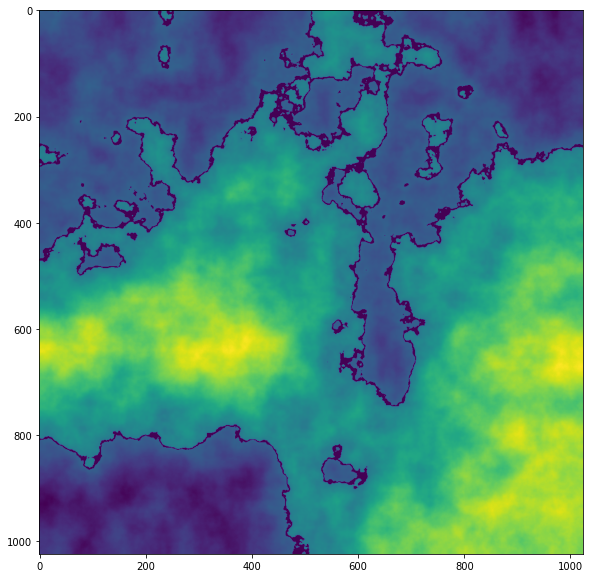

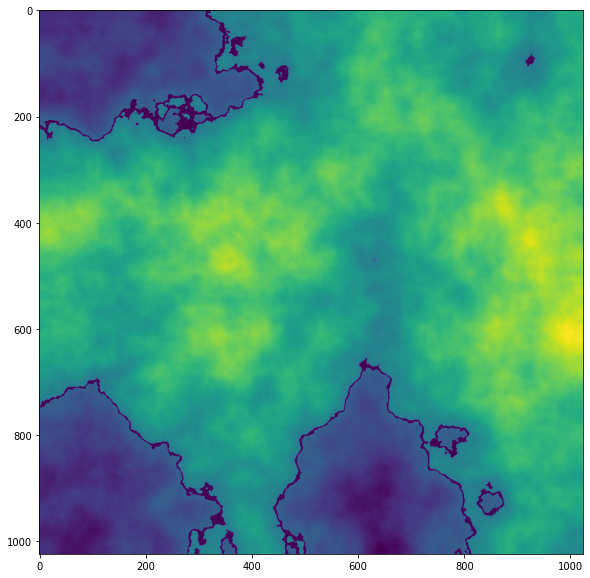

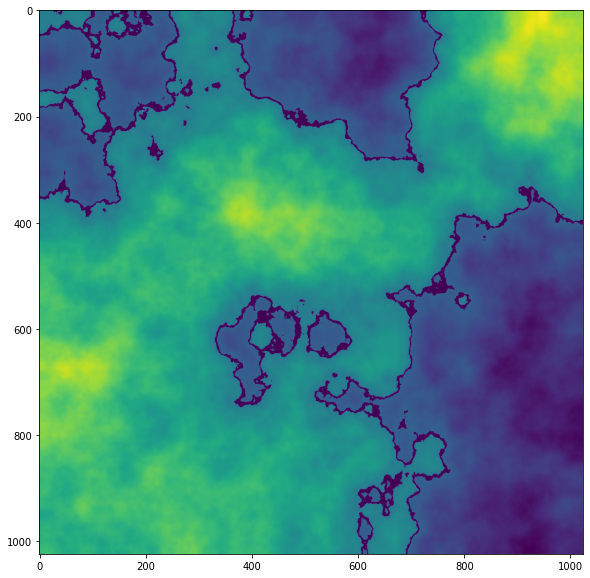

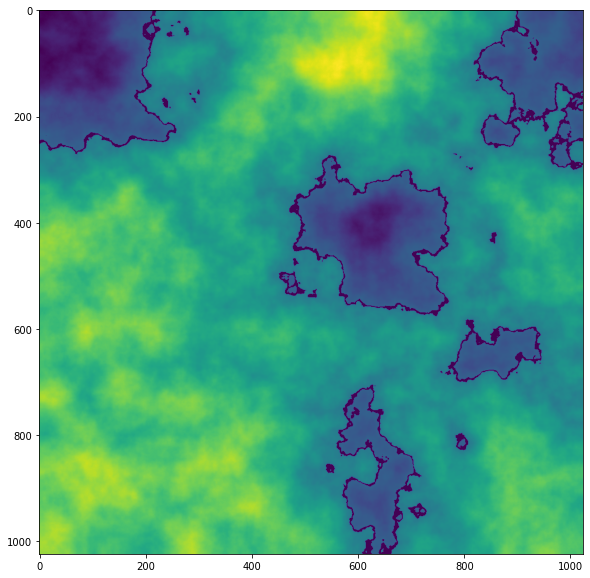

In [17]:
# By adding back in an earlier layer, we can aim for larger continents
for i in range(5):
    _ = generate( map_size=10, start_point=4, extra_layers=[2] )
    _ = select(_,0.4, 0.01)
    show( _ )

In [18]:
# Thats all! enjoy